### Diferença entre Camadas Densas e Convolucionais

- **Camadas Densas (Fully Connected):**
  - Aprendem **padrões globais** nos dados de entrada.
  - Exemplo: no MNIST, analisam todos os pixels ao mesmo tempo.

- **Camadas Convolucionais:**
  - Aprendem **padrões locais** observando pequenas janelas da entrada.
  - Exemplo: identificam padrões em regiões 3×3 de uma imagem.

Camadas convolucionais são mais eficientes para dados espaciais como imagens, pois focam em pequenas partes da entrada de cada vez.

### Propriedades Interessantes das Redes Convolucionais (ConvNets)

1. **Invariância à Translação:**
   - Após aprender um padrão em uma parte da imagem (ex: canto inferior direito), a rede pode reconhecê-lo em qualquer outro lugar (ex: canto superior esquerdo).
   - Isso torna as convnets mais **eficientes com dados**, pois precisam de **menos exemplos** para generalizar bem.
   - Redes densas teriam que reaprender o mesmo padrão em cada nova posição.

2. **Hierarquia Espacial de Padrões:**
   - **Primeiras camadas convolucionais** aprendem padrões simples (ex: bordas).
   - **Camadas intermediárias** aprendem combinações desses padrões simples (ex: formas).
   - **Camadas mais profundas** aprendem conceitos visuais mais complexos (ex: rostos, objetos).
   - Isso reflete a estrutura **hierárquica e espacial** do mundo visual.

### Como Funciona a Operação de Convolução

- Convoluções atuam sobre **tensores de rank 3** chamados **mapas de características (feature maps)**:
  - Possuem 2 eixos espaciais: **altura** e **largura**.
  - E 1 eixo de profundidade (**channels**):
    - Imagens RGB: profundidade = 3 (vermelho, verde e azul).
    - Imagens em preto e branco (ex: MNIST): profundidade = 1 (tons de cinza).

- A convolução:
  - Extrai **pequenos blocos (patches)** da entrada e aplica a **mesma transformação** em todos.
  - Gera um novo **mapa de características de saída**, também um tensor de rank 3.

- A profundidade da **saída** é definida pelo número de **filtros** na camada:
  - Cada filtro aprende a detectar um **padrão específico** nos dados.
  - Ex: um filtro pode detectar bordas, outro pode detectar curvas, outro pode representar algo mais abstrato, como "presença de um rosto".

- **Exemplo (MNIST):**
  - Entrada: mapa (28, 28, 1).
  - Saída após 1ª convolução: mapa (26, 26, 32).
    - 32 filtros aplicados → 32 canais de saída.
    - Cada canal contém uma **resposta do filtro** ao longo da imagem.

### Entendendo Feature Maps e Parâmetros de Convolução

- **Feature Map** (Mapa de Características):
  - Cada **dimensão do eixo de profundidade** representa um **filtro** (ou "feature").
  - O tensor bidimensional `output[:, :, n]` representa um **mapa de resposta** do filtro `n`, indicando onde esse padrão aparece na imagem.

- **Parâmetros principais de uma convolução:**
  1. **Tamanho da Janela (Patch):**
     - Define o tamanho do bloco extraído da imagem.
     - Exemplo comum: **3×3** ou **5×5**.
  2. **Profundidade da Saída:**
     - Define o número de **filtros** aplicados.
     - Exemplo: `Conv2D(32, (3, 3))` aplica 32 filtros 3×3 → saída com profundidade 32.

- **Como a convolução funciona:**
  - A janela 3D (ex: 3×3×input_depth) é **deslizada** pela imagem de entrada.
  - Em cada posição, um **patch** é extraído e transformado em um **vetor 1D** (tamanho = número de filtros).
  - Isso é feito por um **produto tensorial** com pesos aprendidos chamados **kernel**.
  - O **mesmo kernel** é usado em todas as posições (compartilhamento de pesos).
  - O resultado final é um **novo tensor 3D**, onde:
    - Cada posição `(i, j, :)` da saída corresponde ao patch centralizado em `(i, j)` da entrada.
    - Cada canal da saída indica a **intensidade da resposta** de um filtro naquela posição.

- **Resumo Visual:**
  - Entrada: `(altura, largura, profundidade)`
  - Janela: `(3, 3, profundidade)`
  - Saída: `(nova_altura, nova_largura, número_de_filtros)`


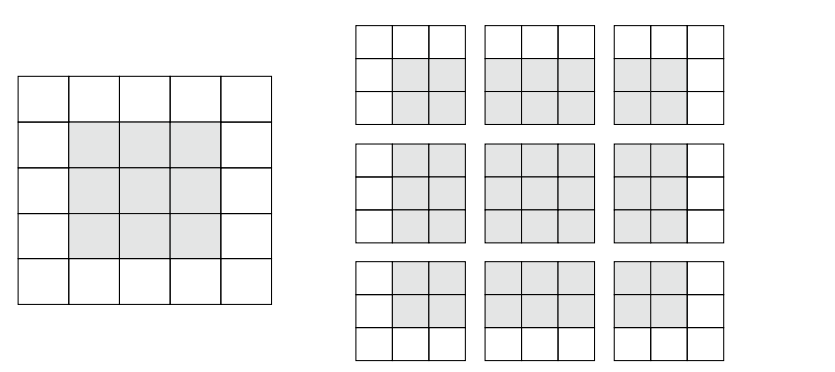

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Lembrete:

- Camadas de MaxPooling reduzem a dimensionalidade
  - Serve para **reduzir a altura e a largura** dos mapas de características (feature maps).
  - Exemplo: uma imagem de entrada 26×26 pode virar 13×13 após o `MaxPooling2D`.

- **Como funciona?**
  - Em vez de aplicar filtros aprendidos como na convolução, o max pooling aplica uma **operação fixa de máximo** em janelas da imagem.
  - Normalmente usa-se janelas de **2×2 com stride 2**, o que significa que a janela se move de 2 em 2 pixels e captura o **maior valor** dentro dela.
  - Isso reduz a imagem pela metade em cada dimensão (altura e largura).

- **Por que usar Max Pooling?**
  - **Reduz o custo computacional**, diminuindo o número de parâmetros e operações.
  - **Torna os padrões mais robustos** a pequenas mudanças (translações) na posição dos objetos.
  - Ajuda a rede a **focar nas características mais importantes** da imagem.


In [2]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)


outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8823 - loss: 0.3698
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9855 - loss: 0.0479
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9908 - loss: 0.0311
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9935 - loss: 0.0228
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9953 - loss: 0.0168


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9898 - loss: 0.0331


In [7]:
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.992


### Fine-Tuning de um Modelo Pré-Treinado

**O que é Fine-Tuning?**
- É uma técnica usada para **ajustar finamente** os pesos de um modelo pré-treinado, tornando-o mais específico para um novo problema.
- Consiste em **descongelar (unfreeze)** algumas das últimas camadas do modelo base e **treiná-las junto com a nova parte adicionada**, geralmente um classificador denso.

**Quando usar Fine-Tuning?**
- Depois de treinar um classificador personalizado sobre um modelo congelado.
- Útil quando temos um conjunto de dados menor, mas queremos aproveitar representações aprendidas de um modelo robusto como o **VGG16**.

**Por que não descongelar tudo desde o início?**
- Porque os gradientes gerados pelo classificador ainda não treinado são grandes e **podem destruir as representações úteis** aprendidas pelas camadas convolucionais.


### Passos para Fazer Fine-Tuning

1. **Adicionar** uma rede personalizada (ex: um classificador denso) no topo de um modelo base já treinado.
2. **Congelar o modelo base** (não permitir o ajuste de seus pesos).
3. **Treinar apenas o classificador adicionado.**
4. **Descongelar algumas camadas superiores** do modelo base (deixar que seus pesos possam ser ajustados).
   - **Não descongelar camadas de _Batch Normalization_**, pois isso pode prejudicar a estabilidade do treinamento.
5. **Treinar novamente**, agora ajustando tanto as camadas descongeladas do modelo base quanto o classificador.



